In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# Loading the datasets (customer, products, and transactions)
customers = pd.read_csv("/content/Customers.csv")
products = pd.read_csv("/content/Products.csv")
transactions = pd.read_csv("/content/Transactions.csv")

In [10]:
# Printing firs 5 coloumns of the datasets
print("Customers Dataset:\n", customers.head())
print("Products Dataset:\n", products.head())
print("Transactions Dataset:\n", transactions.head())

Customers Dataset:
   CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
Products Dataset:
   ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
Transactions Dataset:
   TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166  

In [12]:
# Checking for missing values
print("\nMissing Values:\n")
print("Customers:")
print(customers.isnull().sum())
print("Products:")
print(products.isnull().sum())
print("Transactions:")
print(transactions.isnull().sum())


Missing Values:

Customers:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
Products:
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
Transactions:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [13]:
# Checking for duplicates
print("\nDuplicate Rows:")
print("Customers:", customers.duplicated().sum())
print("Products:", products.duplicated().sum())
print("Transactions:", transactions.duplicated().sum())


Duplicate Rows:
Customers: 0
Products: 0
Transactions: 0


In [15]:
# Analysis of customers
print("\nCustomer Summary:")
print(customers.describe(include='all'))


Customer Summary:
       CustomerID      CustomerName         Region  SignupDate
count         200               200            200         200
unique        200               200              4         179
top         C0001  Lawrence Carroll  South America  2024-11-11
freq            1                 1             59           3


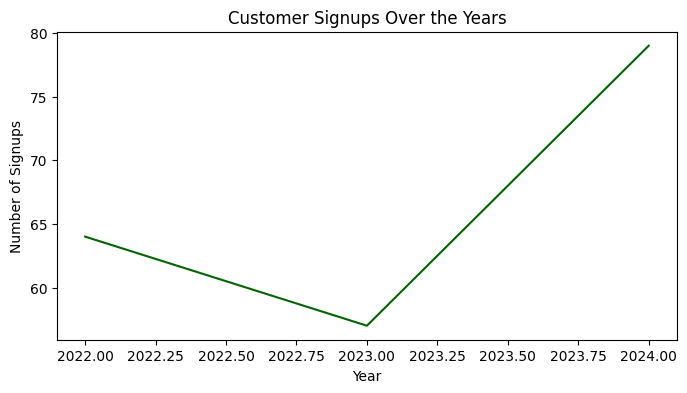

In [16]:
# Sign-ups over time
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
customers['SignupYear'] = customers['SignupDate'].dt.year
plt.figure(figsize=(8, 4))
customers['SignupYear'].value_counts().sort_index().plot(kind='line', color='darkgreen')
plt.title('Customer Signups Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Signups')
plt.show()

In [17]:
# Analysis of Products
print("\nProduct Summary:")
print(products.describe(include='all'))


Product Summary:
       ProductID            ProductName Category       Price
count        100                    100      100  100.000000
unique       100                     66        4         NaN
top         P001  ActiveWear Smartwatch    Books         NaN
freq           1                      4       26         NaN
mean         NaN                    NaN      NaN  267.551700
std          NaN                    NaN      NaN  143.219383
min          NaN                    NaN      NaN   16.080000
25%          NaN                    NaN      NaN  147.767500
50%          NaN                    NaN      NaN  292.875000
75%          NaN                    NaN      NaN  397.090000
max          NaN                    NaN      NaN  497.760000


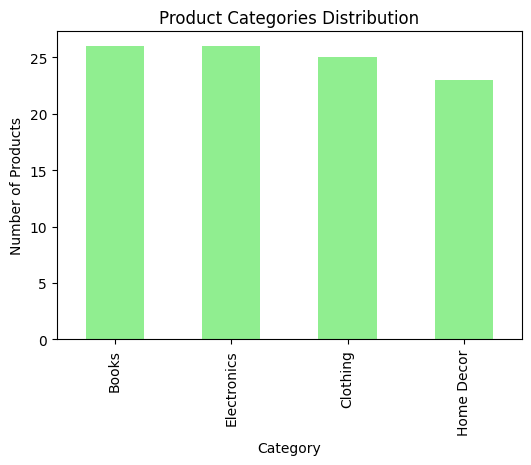

In [19]:
# categories of products
plt.figure(figsize=(6, 4))
products['Category'].value_counts().plot(kind='bar', color='lightgreen')
plt.title('Product Categories Distribution')
plt.xlabel('Category')
plt.ylabel('Number of Products')
plt.show()

In [20]:
# Analysis of transactions
print("\nTransaction Summary:")
print(transactions.describe())


Transaction Summary:
          Quantity   TotalValue       Price
count  1000.000000  1000.000000  1000.00000
mean      2.537000   689.995560   272.55407
std       1.117981   493.144478   140.73639
min       1.000000    16.080000    16.08000
25%       2.000000   295.295000   147.95000
50%       3.000000   588.880000   299.93000
75%       4.000000  1011.660000   404.40000
max       4.000000  1991.040000   497.76000


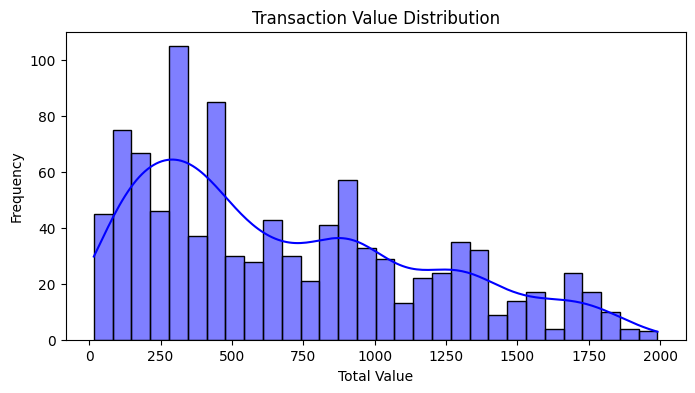

In [21]:
# Distribution of Transaction Values
plt.figure(figsize=(8, 4))
sns.histplot(transactions['TotalValue'], bins=30, kde=True, color='blue')
plt.title('Transaction Value Distribution')
plt.xlabel('Total Value')
plt.ylabel('Frequency')
plt.show()

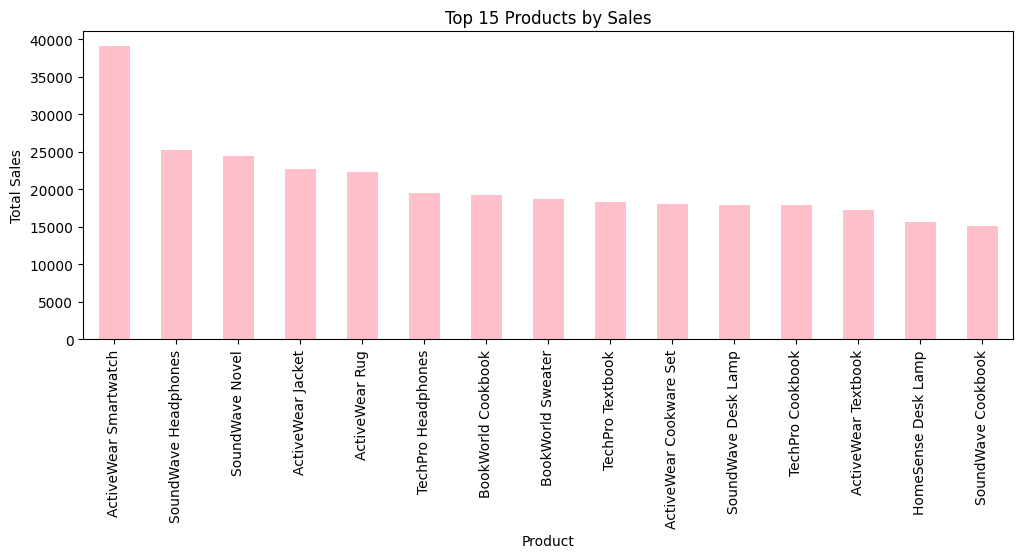

In [27]:
# Top Products by Sales
merged = pd.merge(transactions, products, on='ProductID', how='left')
top_products = merged.groupby('ProductName')['TotalValue'].sum().sort_values(ascending=False).head(15)
plt.figure(figsize=(12, 4))
top_products.plot(kind='bar', color='pink')
plt.title('Top 15 Products by Sales')
plt.xlabel('Product')
plt.ylabel('Total Sales')
plt.show()

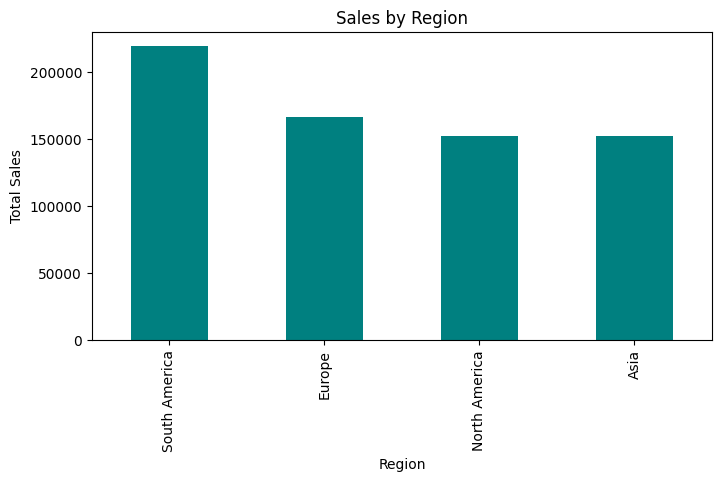

In [28]:
# Regional Analysis
merged_customers = pd.merge(transactions, customers, on='CustomerID', how='left')
region_sales = merged_customers.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
plt.figure(figsize=(8, 4))
region_sales.plot(kind='bar', color='teal')
plt.title('Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.show()